In [10]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%config InlineBackend.figure_format='retina'
import pandas as pd


# Load data

In [15]:
t2m_era5 = xr.open_mfdataset('/data0/samuelb/como2024/ERA5/T2m/balkans/ERA5_????_T2m_*.nc').var167.squeeze()
sm_era5 = xr.open_mfdataset('/data0/samuelb/como2024/ERA5/swvl1_land/balkans/ERAland_????_swvl1_*.nc').var39.squeeze()


In [16]:
landmask = sm_era5.isel(time=0)!=9.96921e+36
t2m_era5 = t2m_era5.where(landmask)
sm_era5 = sm_era5.where(landmask)


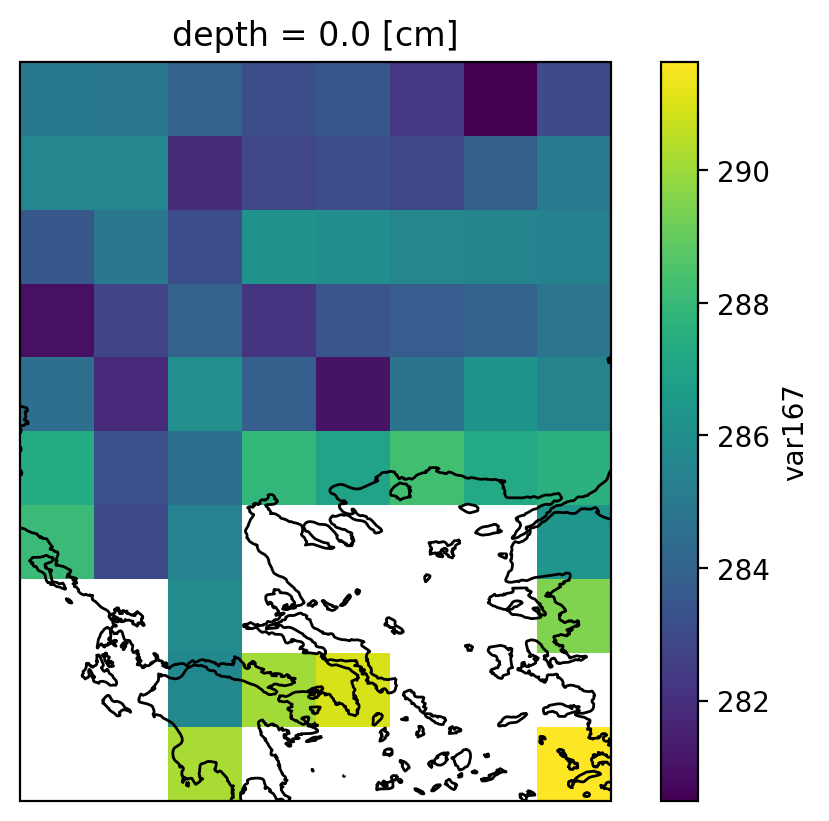

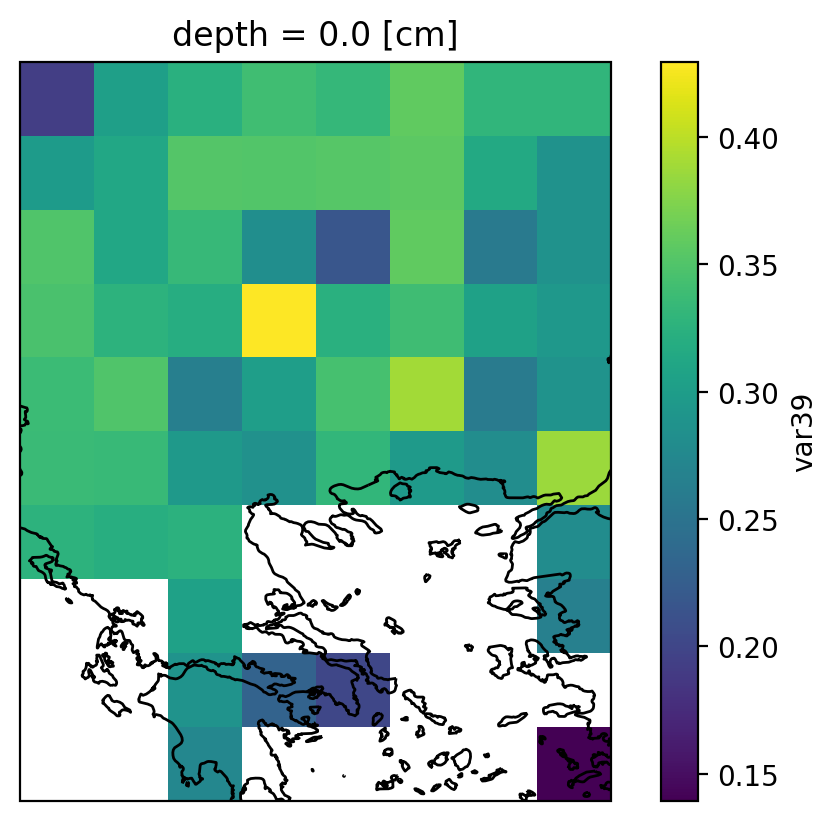

In [18]:
t2m_era5.mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()
sm_era5.mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()


# Resample data

In [22]:
# Resample for each window:
for window in [3,5,7]:
    print(f'{window} –––– start')
    t2m_era5.resample(time=f'{window}D').mean().to_netcdf(f'/data0/samuelb/como2024/ERA5_resampled/t2m_balkans_{window}daymean.nc')
    sm_era5.resample(time=f'{window}D').mean().to_netcdf(f'/data0/samuelb/como2024/ERA5_resampled/sm_balkans_{window}daymean.nc')


3–––– start
5–––– start
7–––– start
